#***`Zomato Delivery Operations Analytics Dataset`***

#***`Problem Statement:`***

---

Analyze the factors affecting delivery time in Zomato’s food delivery service. Identify trends, delays, and key influences like traffic, weather, vehicle type, and multiple deliveries to improve efficiency.

 The goal is to gain insights that help improve delivery efficiency and customer satisfaction.

#***`Source:`***

---

https://www.kaggle.com/datasets/saurabhbadole/zomato-delivery-operations-analytics-dataset?utm_source=chatgpt.com

#***`Key Features:`***

---

* ID: Unique order ID

* Delivery_person_ID: Unique ID of the delivery person

* Delivery_person_Age: Age of the delivery person

* Delivery_person_Ratings: Customer rating of the delivery person

* Restaurant_latitude & longitude: Location of the restaurant

* Delivery_location_latitude & longitude: Location of the customer

* Order_Date: Date of the order

* Time_Orderd: Time the order was placed

* Time_Order_picked: Time the order was picked up

* Weather_conditions: Weather during delivery

* Road_traffic_density: Traffic level (Low, Medium, High, Jam)

* Vehicle_condition: Condition of the delivery vehicle

* Type_of_order: Type of food ordered (Meal, Snack, Drinks, Buffet)

* Type_of_vehicle: Vehicle used for delivery

* Multiple_deliveries: Number of deliveries in a single trip

* Festival: Whether it was a festival day (Yes/No)

* City: Type of city (Metropolitan, Urban, Semi-urban)

* Time_taken (min) (Target): Total delivery time in minutes

#***`Target Variable:`***

---

`Time_taken (min)`

* This represents the delivery time in minutes for each order.

* The goal is to analyze factors influencing this variable and find ways to optimize delivery speed.

#***`Understanding the data`***

In [ ]:
#importing necessary libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading dataset
df=pd.read_csv("/content/Zomato Dataset.csv")

In [ ]:
# Preview the first few rows of the dataset
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [ ]:
# Preview the last few rows of the dataset
df.tail()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
45579,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26
45583,0x5fb2,RANCHIRES09DEL02,23.0,4.9,23.351058,85.325731,23.431058,85.405731,02-03-2022,17:10,17:15,Fog,Medium,2,Snack,scooter,1.0,No,Metropolitian,36


In [ ]:
# Preview the some random rows of the dataset
df.sample(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
14220,0x312d,CHENRES010DEL02,23.0,5.0,13.066762,80.251865,13.146762,80.331865,18-03-2022,23:45,23:50,Sandstorms,Low,1,Snack,motorcycle,1.0,No,Urban,19
38860,0x43d4,RANCHIRES14DEL01,36.0,4.8,0.000000,0.000000,0.070000,0.070000,25-03-2022,22:50,23:05,Sunny,Low,2,Drinks,scooter,0.0,No,NaN,19
39938,0x1ae7,HYDRES19DEL03,35.0,4.9,17.458998,78.500366,17.488998,78.530366,21-03-2022,19:55,0.833333333,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,28
22619,0xdc85,BHPRES010DEL02,28.0,4.7,23.266261,77.379605,23.316261,77.429605,15-02-2022,23:20,23:25,Sandstorms,Low,1,Meal,motorcycle,0.0,No,Urban,12
14916,0xc920,ALHRES13DEL01,35.0,4.6,25.451646,81.832796,25.561646,81.942796,12-02-2022,17:50,0.75,Windy,Medium,0,Snack,motorcycle,NaN,No,Metropolitian,31
35090,0x2f8c,HYDRES04DEL01,25.0,4.9,17.411028,78.329645,17.481028,78.399645,10-03-2022,1,24:15:00,Stormy,Low,0,Snack,motorcycle,0.0,No,Metropolitian,24
12288,0x940,SURRES02DEL02,50.0,6.0,21.186608,72.794136,21.206608,72.814136,01-03-2022,NaN,11:25,NaN,NaN,3,Meal,scooter,1.0,No,Urban,22
36689,0x6797,INDORES15DEL01,34.0,4.9,22.760072,75.892574,22.870072,76.002574,12-03-2022,17:35,17:45,Sandstorms,Medium,1,Snack,motorcycle,1.0,No,Metropolitian,22
18049,0x93d9,INDORES010DEL01,33.0,4.9,22.750040,75.902847,22.790040,75.942847,13-03-2022,12:20,12:30,Sunny,High,1,Meal,motorcycle,1.0,No,Metropolitian,20
14963,0xd44d,AGRRES13DEL02,23.0,4.9,27.159795,78.042990,27.179795,78.062990,15-02-2022,10:30,10:35,Fog,Low,0,Drinks,motorcycle,0.0,No,Metropolitian,22


In [ ]:
#Columns
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [ ]:
# Checking data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [ ]:
# rows and columns
df.shape

(45584, 20)

In [ ]:
#summary of the  categorical columns
df.describe(include='object')

,ID,Delivery_person_ID,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
count,45584,45584,45584,43853,45584,44968,44983,45584,45584,45356,44384
unique,45584,1320,44,176,193,6,4,4,4,2,3
top,0x2bed,PUNERES01DEL01,15-03-2022,21:55,21:30,Fog,Low,Snack,motorcycle,No,Metropolitian
freq,1,67,1192,461,495,7653,15476,11530,26429,44460,34087


In [ ]:
#summary of the  numerical columns
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


#***`Data Cleaning`***

In [ ]:
# Convert 'Order_Date' to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format="%d-%m-%Y")

In [ ]:
# Convert 'Time_Orderd' and 'Time_Order_picked' to time format, handling missing values
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format="%H:%M", errors='coerce')
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format="%H:%M", errors='coerce')

In [ ]:
#displays the total number of missing values
df.isnull().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,1854
Delivery_person_Ratings,1908
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,5799


In [ ]:
# Fill missing numerical values with median
df['Delivery_person_Age'].fillna(df['Delivery_person_Age'].median(), inplace=True)
df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median(), inplace=True)
df['multiple_deliveries'].fillna(df['multiple_deliveries'].median(), inplace=True)

<ipython-input-444-fdb54646c009>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Delivery_person_Age'].fillna(df['Delivery_person_Age'].median(), inplace=True)
<ipython-input-444-fdb54646c009>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [ ]:
# Fill missing categorical values with mode
for col in ['Weather_conditions', 'Road_traffic_density', 'Festival', 'City']:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-445-0a97ce848623>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
#displays the total number of missing values
df.isnull().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,5799


In [ ]:
#There is more than 50% missing.so,it droped
df.drop(columns=["Time_Orderd","Time_Order_picked"],inplace=True)

In [ ]:
df.shape

(45584, 18)

In [ ]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print("\nDuplicate Rows:", duplicate_count)


Duplicate Rows: 0


# ***`Visualization`***

##**Delivery Time Distribution**

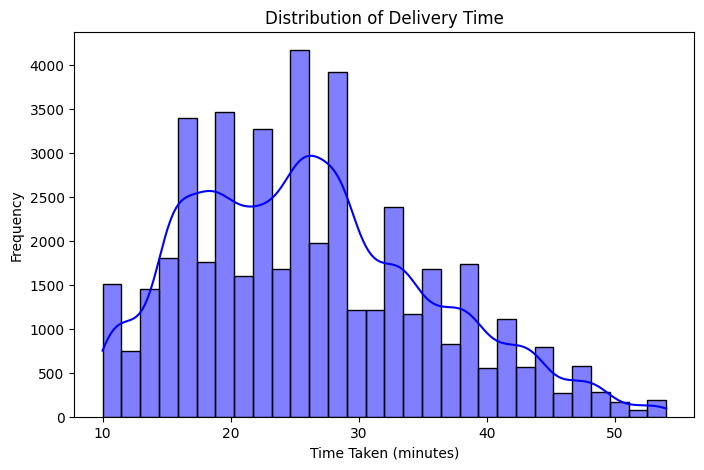

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['Time_taken (min)'], bins=30, kde=True, color='blue')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery Time')
plt.show()

1️⃣ Delivery Time Distribution

* The majority of deliveries fall within a typical range, but there are some outliers indicating delays.

* The distribution shows a right-skewed trend, meaning that while most deliveries are completed in a reasonable time, some take significantly longer.

✅ Actionable Insight: Investigate the causes of extreme delays—possible reasons include traffic, weather, or multiple orders per trip.

##**Impact of Traffic on Delivery Time**

<ipython-input-451-4a4e00499127>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Road_traffic_density', y='Time_taken (min)', data=df, palette='coolwarm')


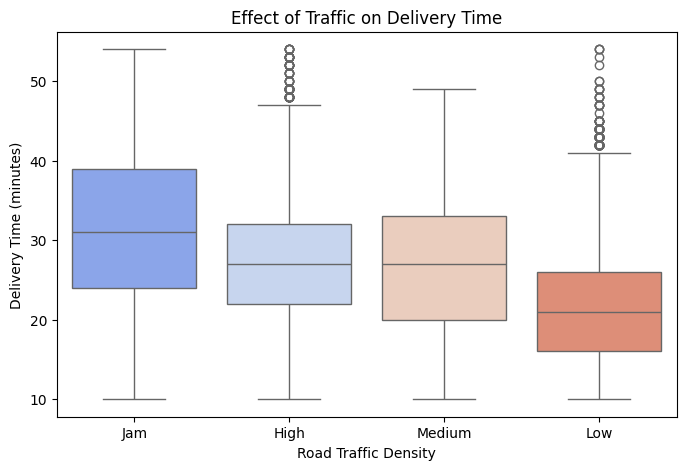

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Road_traffic_density', y='Time_taken (min)', data=df, palette='coolwarm')
plt.xlabel('Road Traffic Density')
plt.ylabel('Delivery Time (minutes)')
plt.title('Effect of Traffic on Delivery Time')
plt.show()

2️⃣ Impact of Traffic on Delivery Time

* Higher traffic density increases delivery time, with "Jam" conditions leading to the longest delays.

* Deliveries in low-traffic areas are much faster than those in high-traffic conditions.

✅ Actionable Insight: Implement dynamic route optimization for peak traffic hours to reduce delays.



##**Effect of Weather on Delivery Time**

<ipython-input-452-27f74a6128e1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Weather_conditions', y='Time_taken (min)', data=df, palette='magma')


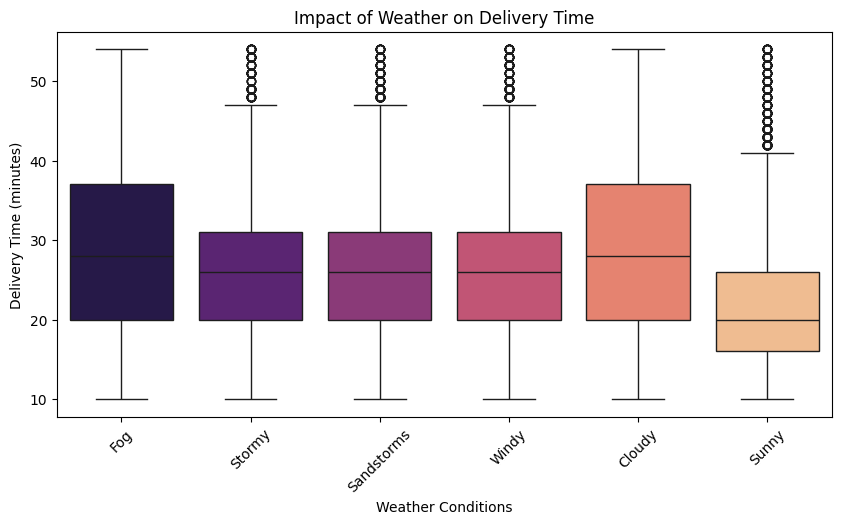

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Weather_conditions', y='Time_taken (min)', data=df, palette='magma')
plt.xticks(rotation=45)
plt.xlabel('Weather Conditions')
plt.ylabel('Delivery Time (minutes)')
plt.title('Impact of Weather on Delivery Time')
plt.show()

3️⃣ Effect of Weather on Delivery Time

* Bad weather conditions like storms and sandstorms significantly increase delivery time.

* Deliveries under "Clear" or "Cloudy" weather are generally faster than those in extreme conditions.

✅ Actionable Insight: During adverse weather, incentivize delivery personnel or adjust ETAs accordingly for better customer satisfaction.

##**Delivery Person Ratings Distribution**

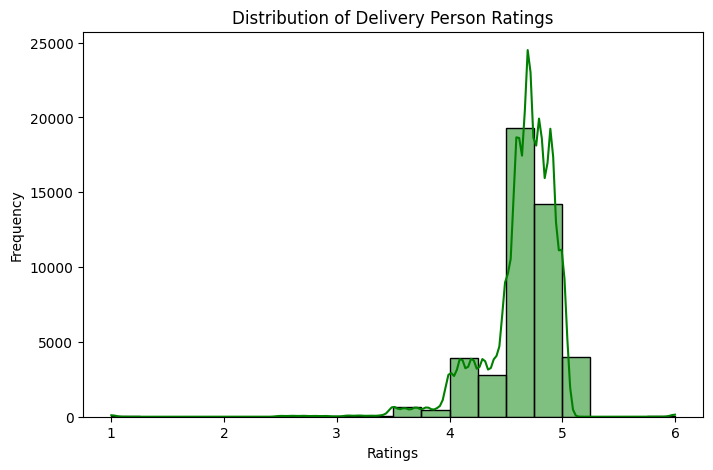

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Delivery_person_Ratings'], bins=20, kde=True, color='green')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery Person Ratings')
plt.show()

4️⃣ Delivery Person Ratings Distribution

* Most delivery personnel have ratings above 4.0, suggesting good customer satisfaction.

* However, a small percentage of drivers have low ratings, which might indicate poor service or frequent delays.

✅ Actionable Insight: Identify low-rated delivery personnel and provide training or feedback mechanisms to improve service quality.

##**Relationship Between Delivery Person Age and Ratings**

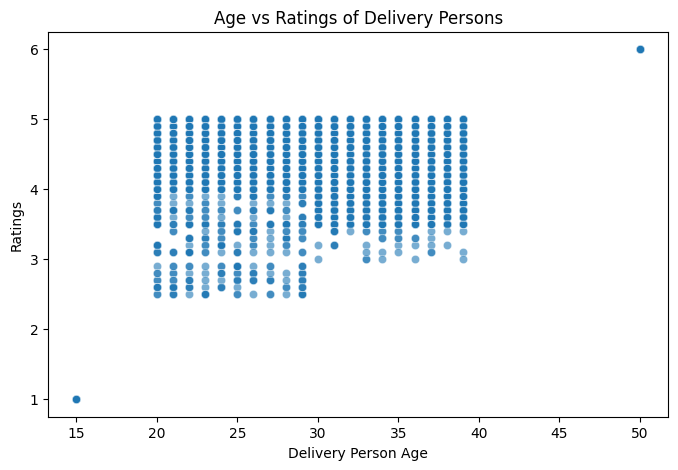

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Delivery_person_Age', y='Delivery_person_Ratings', data=df, alpha=0.6)
plt.xlabel('Delivery Person Age')
plt.ylabel('Ratings')
plt.title('Age vs Ratings of Delivery Persons')
plt.show()

5️⃣ Relationship Between Delivery Person Age and Ratings

* No strong correlation between age and ratings—younger and older delivery personnel receive both high and low ratings.

* However, younger delivery personnel show a wider range of ratings, possibly due to inexperience.

✅ Actionable Insight: Implement mentorship programs where experienced delivery personnel guide younger employees to improve service quality.

##**Vehicle Type vs Delivery Time**

<ipython-input-455-5fb4274169ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type_of_vehicle', y='Time_taken (min)', data=df, palette='viridis')


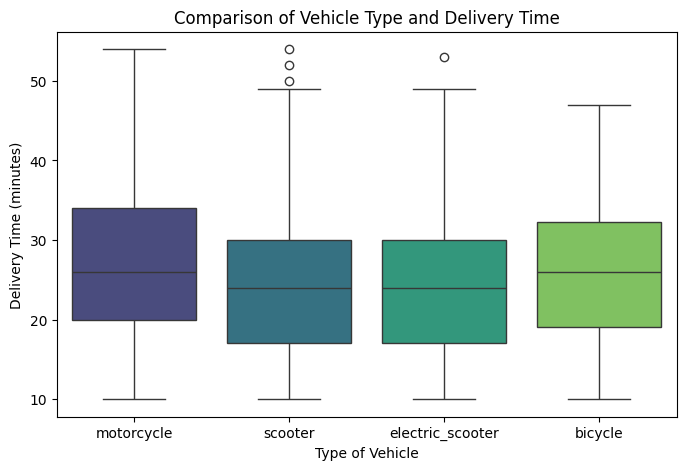

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Type_of_vehicle', y='Time_taken (min)', data=df, palette='viridis')
plt.xlabel('Type of Vehicle')
plt.ylabel('Delivery Time (minutes)')
plt.title('Comparison of Vehicle Type and Delivery Time')
plt.show()

6️⃣ Vehicle Type vs Delivery Time

* Motorcycles appear to have the fastest delivery times, whereas other vehicle types (e.g., scooters) may take longer.

* Some larger vehicle types could be causing delays due to traffic congestion or slower navigation.

✅ Actionable Insight: Encourage motorcycles for high-traffic zones and optimize vehicle allocation based on area density.

##**Order Type vs Delivery Time**

<ipython-input-456-fc463050bec3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type_of_order', y='Time_taken (min)', data=df, palette='Set2')


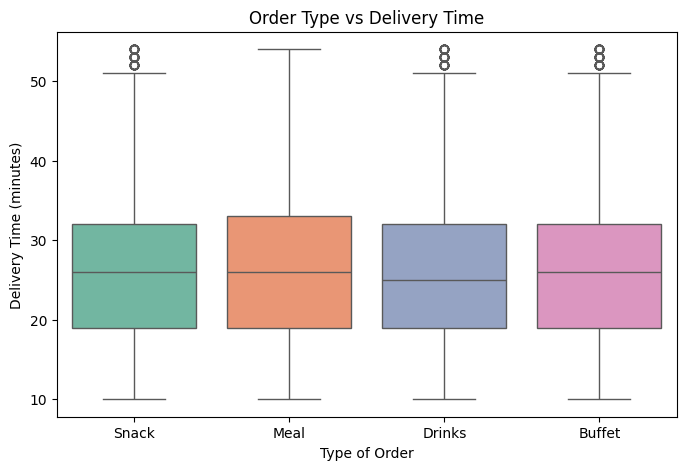

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Type_of_order', y='Time_taken (min)', data=df, palette='Set2')
plt.xlabel('Type of Order')
plt.ylabel('Delivery Time (minutes)')
plt.title('Order Type vs Delivery Time')
plt.show()

7️⃣ Order Type vs Delivery Time

* Meals take longer to deliver compared to snacks and drinks.

* Drinks and buffet items tend to have faster delivery times.

✅ Actionable Insight: Optimize restaurant preparation times and coordinate with drivers to reduce waiting times for longer-prep orders.



##**Festival Impact on Delivery Time**

<ipython-input-457-5cef64ea16dd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Festival', y='Time_taken (min)', data=df, palette='coolwarm')


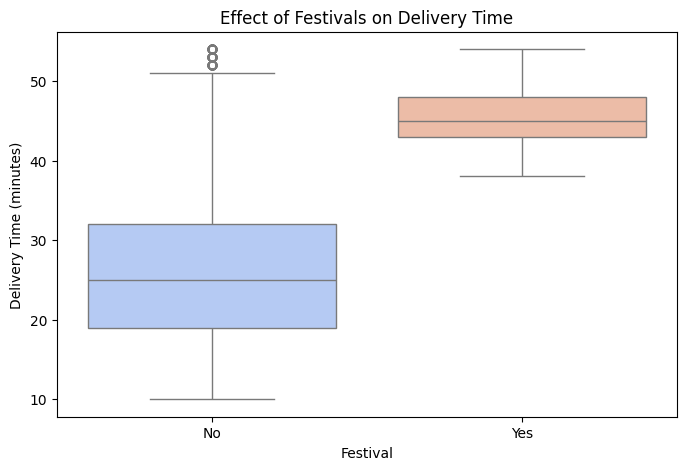

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Festival', y='Time_taken (min)', data=df, palette='coolwarm')
plt.xlabel('Festival')
plt.ylabel('Delivery Time (minutes)')
plt.title('Effect of Festivals on Delivery Time')
plt.show()

8️⃣ Festival Impact on Delivery Time

* Delivery times increase during festivals, likely due to high demand and traffic congestion.

* Some cities may experience extreme delivery slowdowns during peak festival seasons.

✅ Actionable Insight: Increase delivery personnel during festivals or introduce surge pricing to manage demand effectively.

##**City-wise Traffic and Delivery Time Trends**

<ipython-input-458-6eaeea9e7ca2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Time_taken (min)', data=df, estimator=lambda x: x.mean(), palette='rocket')


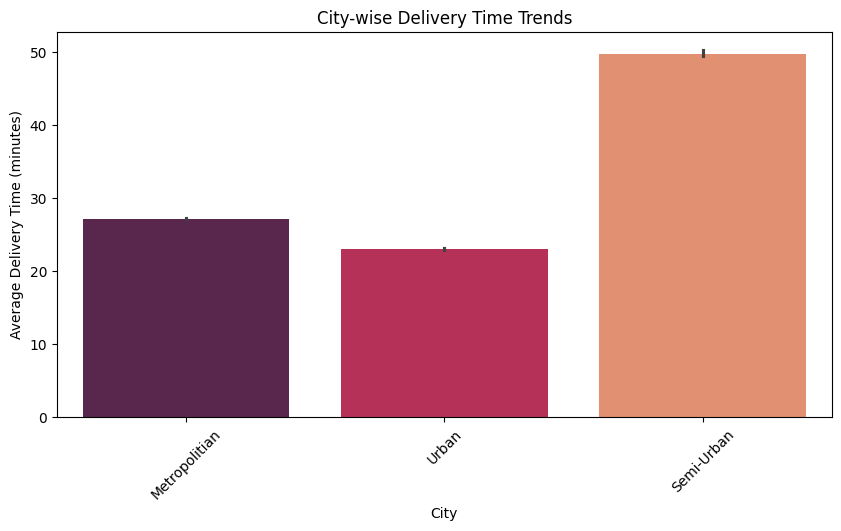

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='City', y='Time_taken (min)', data=df, estimator=lambda x: x.mean(), palette='rocket')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Average Delivery Time (minutes)')
plt.title('City-wise Delivery Time Trends')
plt.show()

9️⃣ City-wise Traffic and Delivery Time Trends

* Some cities experience consistently longer delivery times than others.

* Likely factors include traffic congestion, road conditions, and restaurant density.

✅ Actionable Insight: Identify high-delay cities and implement local strategies such as zone-based delivery optimizations or restaurant partnerships closer to demand zones.

##**Multiple Deliveries and Time Efficiency**

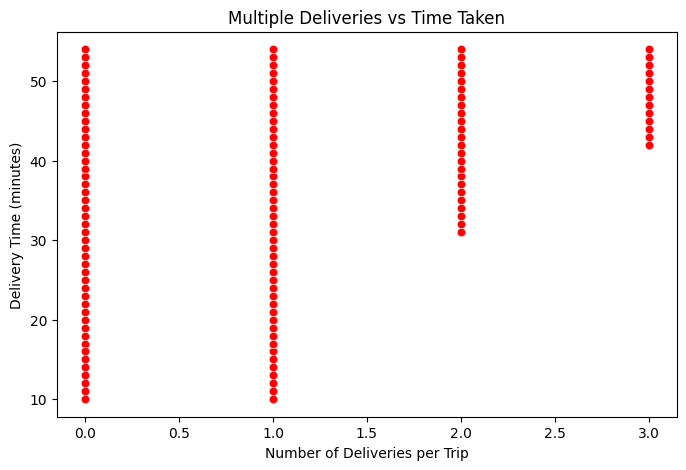

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='multiple_deliveries', y='Time_taken (min)', data=df, alpha=0.6, color='red')
plt.xlabel('Number of Deliveries per Trip')
plt.ylabel('Delivery Time (minutes)')
plt.title('Multiple Deliveries vs Time Taken')
plt.show()

🔟 Multiple Deliveries and Time Efficiency

* More deliveries per trip tend to increase total delivery time, but the relationship is not strictly linear.

* Some drivers handling multiple orders manage to deliver efficiently, likely due to optimal route planning.

✅ Actionable Insight: Use AI-driven route planning to minimize total delivery time while ensuring efficient batch deliveries.

#***`Outlier Detection and handling`***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45584 non-null  object        
 1   Delivery_person_ID           45584 non-null  object        
 2   Delivery_person_Age          45584 non-null  float64       
 3   Delivery_person_Ratings      45584 non-null  float64       
 4   Restaurant_latitude          45584 non-null  float64       
 5   Restaurant_longitude         45584 non-null  float64       
 6   Delivery_location_latitude   45584 non-null  float64       
 7   Delivery_location_longitude  45584 non-null  float64       
 8   Order_Date                   45584 non-null  datetime64[ns]
 9   Weather_conditions           45584 non-null  object        
 10  Road_traffic_density         45584 non-null  object        
 11  Vehicle_condition            45584 non-nu

In [ ]:
import pandas as pd

# Define function to calculate IQR outliers
def detect_iqr_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (column < lower_bound) | (column > upper_bound)

# Select only numerical columns
numerical_cols = df.select_dtypes(include=["number"]).columns

# Apply the function to numerical columns
outliers_iqr = df[numerical_cols].apply(detect_iqr_outliers)

# View outliers
print("Outliers detected using IQR")
print(outliers_iqr.sum())  # Count of outliers per column


Outliers detected using IQR
Delivery_person_Age              53
Delivery_person_Ratings        5345
Restaurant_latitude             431
Restaurant_longitude           4655
Delivery_location_latitude        0
Delivery_location_longitude    6515
Vehicle_condition                 0
multiple_deliveries             361
Time_taken (min)                270
dtype: int64


In [ ]:
#filter out the rows with any outliers
df=df[~(outliers_iqr.any(axis=1))]
print("Data after removing outliers (IQR):")
print(df)

Data after removing outliers (IQR):
           ID Delivery_person_ID  Delivery_person_Age  \
1      0xd987      KOCRES16DEL01                 21.0   
2      0x2784     PUNERES13DEL03                 23.0   
3      0xc8b6     LUDHRES15DEL02                 34.0   
4      0xdb64      KNPRES14DEL02                 24.0   
5      0x3af3      MUMRES15DEL03                 29.0   
...       ...                ...                  ...   
45575  0xa333     CHENRES08DEL02                 37.0   
45577  0x4e21     BANGRES16DEL03                 28.0   
45579  0x7c09      JAPRES04DEL01                 30.0   
45581  0x4f8d     CHENRES08DEL03                 30.0   
45582  0x5eee    COIMBRES11DEL01                 20.0   

       Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
1                          4.7            10.003064             76.307589   
2                          4.7            18.562450             73.916619   
3                          4.3            30.899

In [ ]:
import pandas as pd
from scipy.stats import zscore

# Select only numerical columns dynamically
numerical_cols = df.select_dtypes(include=["number"]).columns

# Compute Z-scores
z_scores = df[numerical_cols].apply(zscore)

# Define threshold
threshold = 3

# Identify outliers
outliers_z = (z_scores.abs() > threshold)

# View outliers
print("Outliers detected using Z-Score:")
print(outliers_z.sum())  # Count of outliers per column


Outliers detected using Z-Score:
Delivery_person_Age              0
Delivery_person_Ratings          0
Restaurant_latitude              0
Restaurant_longitude           348
Delivery_location_latitude       0
Delivery_location_longitude    348
Vehicle_condition                0
multiple_deliveries              0
Time_taken (min)                47
dtype: int64


In [ ]:
df.shape

(33765, 18)

##***`Feature Transformation`***

In [ ]:
import pandas as pd

# Select only numerical columns dynamically
numerical_cols = df.select_dtypes(include=["number"]).columns

# Compute skewness
skewness = df[numerical_cols].skew()

# Display results
print("Skewness of numerical columns:")
print(skewness)


Skewness of numerical columns:
Delivery_person_Age            0.052352
Delivery_person_Ratings       -0.370010
Restaurant_latitude            0.247122
Restaurant_longitude           0.524279
Delivery_location_latitude     0.247916
Delivery_location_longitude    0.518369
Vehicle_condition              0.006066
multiple_deliveries           -0.196576
Time_taken (min)               0.585301
dtype: float64


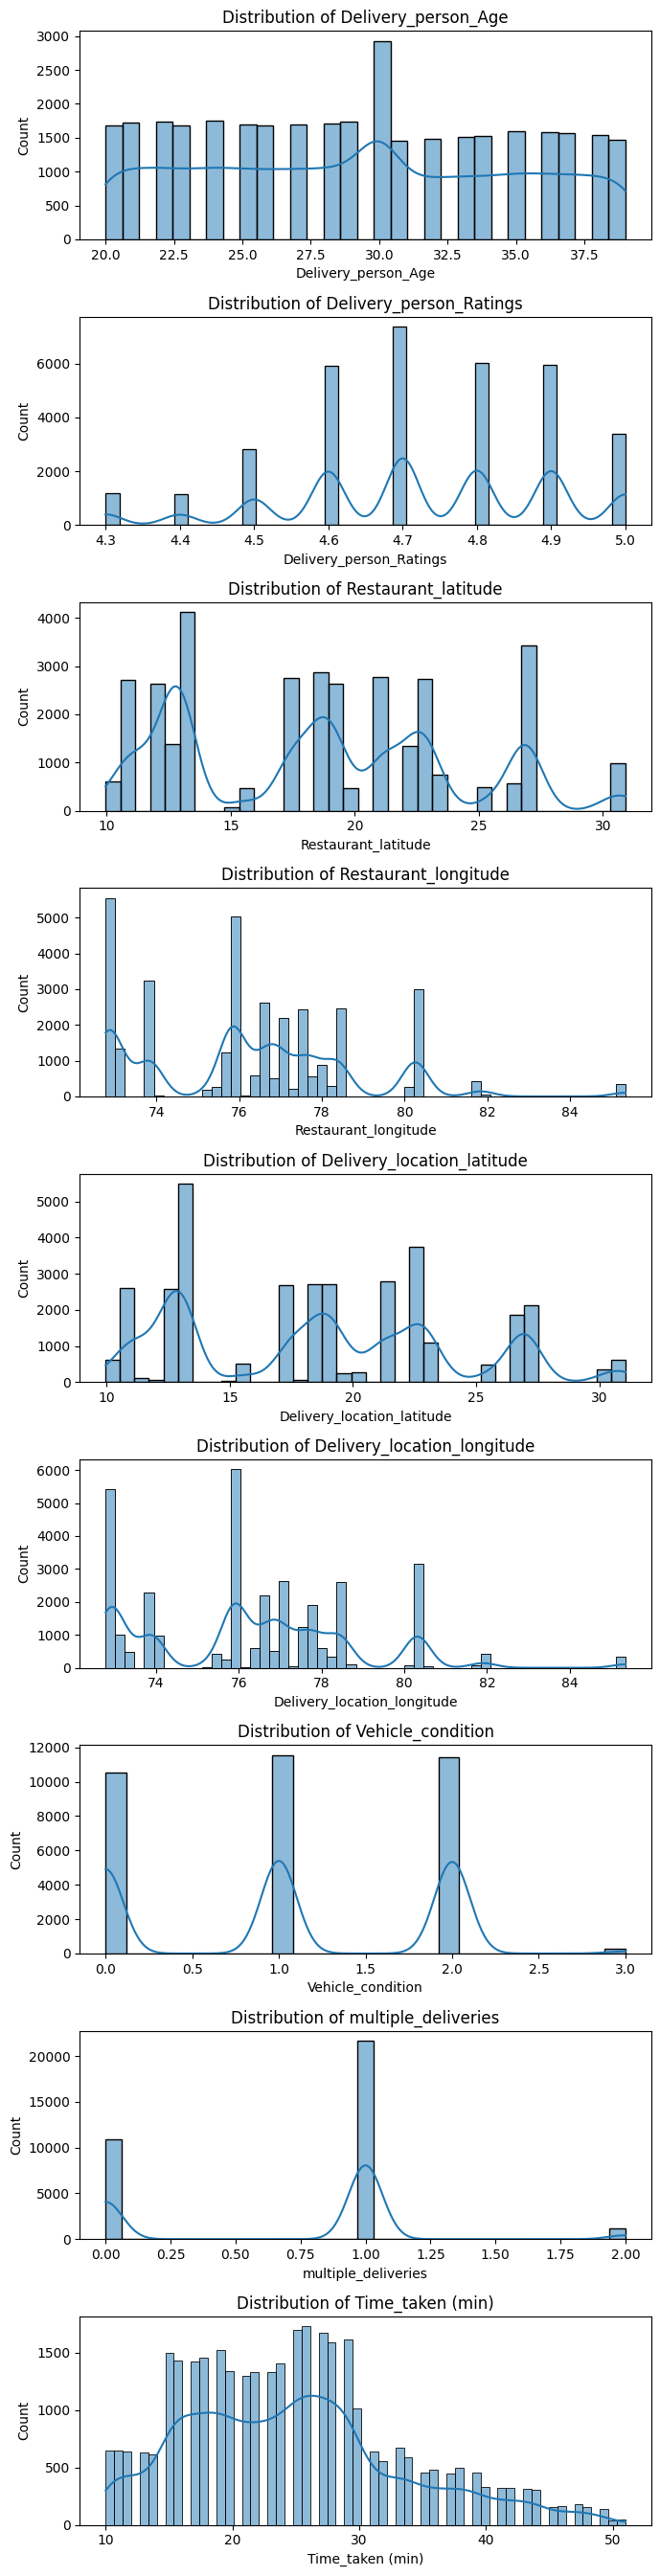

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns dynamically
numerical_cols = df.select_dtypes(include=["number"]).columns

# Set up a grid layout for multiple plots
fig, axes = plt.subplots(nrows=len(numerical_cols), figsize=(7, len(numerical_cols) * 3))

# Loop through numerical columns and plot histograms
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])  # Use predefined axes
    axes[i].set_title(f"Distribution of {col}")

# Adjust layout
plt.tight_layout()
plt.show()

##***`Encoding`***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33765 entries, 1 to 45582
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           33765 non-null  object        
 1   Delivery_person_ID           33765 non-null  object        
 2   Delivery_person_Age          33765 non-null  float64       
 3   Delivery_person_Ratings      33765 non-null  float64       
 4   Restaurant_latitude          33765 non-null  float64       
 5   Restaurant_longitude         33765 non-null  float64       
 6   Delivery_location_latitude   33765 non-null  float64       
 7   Delivery_location_longitude  33765 non-null  float64       
 8   Order_Date                   33765 non-null  datetime64[ns]
 9   Weather_conditions           33765 non-null  object        
 10  Road_traffic_density         33765 non-null  object        
 11  Vehicle_condition            33765 non-null  i

In [ ]:
df.nunique()

,0
ID,33765
Delivery_person_ID,1088
Delivery_person_Age,20
Delivery_person_Ratings,8
Restaurant_latitude,366
Restaurant_longitude,366
Delivery_location_latitude,3968
Delivery_location_longitude,3968
Order_Date,44
Weather_conditions,6


In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df["ID"]=le.fit_transform(df["ID"])
df["Delivery_person_ID"]=le.fit_transform(df["Delivery_person_ID"])

print(df["ID"].dtype)
print(df["Delivery_person_ID"].dtype)

int64
int64


In [ ]:
#Now you can access the classes_ attribute from "le"
location_labels=dict(zip(le.classes_,range(len(le.classes_))))
print(location_labels)

{'AGRRES010DEL01': 0, 'AGRRES010DEL02': 1, 'AGRRES010DEL03': 2, 'AGRRES01DEL01': 3, 'AGRRES01DEL02': 4, 'AGRRES01DEL03': 5, 'AGRRES03DEL01': 6, 'AGRRES03DEL02': 7, 'AGRRES03DEL03': 8, 'AGRRES04DEL01': 9, 'AGRRES04DEL02': 10, 'AGRRES04DEL03': 11, 'AGRRES05DEL01': 12, 'AGRRES05DEL02': 13, 'AGRRES05DEL03': 14, 'AGRRES07DEL01': 15, 'AGRRES07DEL02': 16, 'AGRRES07DEL03': 17, 'AGRRES08DEL01': 18, 'AGRRES08DEL02': 19, 'AGRRES08DEL03': 20, 'AGRRES11DEL01': 21, 'AGRRES11DEL02': 22, 'AGRRES11DEL03': 23, 'AGRRES12DEL01': 24, 'AGRRES12DEL02': 25, 'AGRRES12DEL03': 26, 'AGRRES13DEL01': 27, 'AGRRES13DEL02': 28, 'AGRRES13DEL03': 29, 'AGRRES14DEL01': 30, 'AGRRES14DEL02': 31, 'AGRRES14DEL03': 32, 'AGRRES17DEL01': 33, 'AGRRES17DEL02': 34, 'AGRRES17DEL03': 35, 'AGRRES18DEL01': 36, 'AGRRES18DEL02': 37, 'AGRRES18DEL03': 38, 'AGRRES20DEL01': 39, 'AGRRES20DEL02': 40, 'AGRRES20DEL03': 41, 'ALHRES01DEL01': 42, 'ALHRES01DEL02': 43, 'ALHRES01DEL03': 44, 'ALHRES02DEL01': 45, 'ALHRES02DEL02': 46, 'ALHRES02DEL03': 47

In [ ]:
df["Weather_conditions"].unique()

array(['Stormy', 'Sandstorms', 'Fog', 'Cloudy', 'Windy', 'Sunny'],
      dtype=object)

In [ ]:
df["Weather_conditions"]=df["Weather_conditions"].map({'Stormy':0,'Sandstorms':1,'Fog':2,'Cloudy':3,'Windy':4,'Sunny':5})
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
1,32215,726,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,0,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,3657,950,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,1,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,29887,778,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,1,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,32481,661,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,2,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
5,6718,839,29.0,4.5,19.176269,72.836721,19.266269,72.926721,2022-04-02,1,Jam,2,Buffet,electric_scooter,1.0,No,Metropolitian,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45575,23956,262,37.0,4.8,13.022394,80.242439,13.042394,80.262439,2022-04-05,1,Low,2,Drinks,electric_scooter,0.0,No,Metropolitian,20
45577,9832,182,28.0,4.9,13.029198,77.570997,13.059198,77.600997,2022-03-30,1,Jam,1,Meal,scooter,1.0,No,Metropolitian,29
45579,17414,579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,4,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45581,10071,263,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,3,Low,1,Drinks,scooter,0.0,No,Metropolitian,16


In [ ]:
df["Road_traffic_density"].unique()

array(['High', 'Medium', 'Low', 'Jam'], dtype=object)

In [ ]:
df["Road_traffic_density"]=df["Road_traffic_density"].map({'High':0,'Medium':1,'Low':2,'Jam':3})
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
1,32215,726,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,0,0,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,3657,950,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,1,1,1,Drinks,scooter,1.0,No,Metropolitian,21
3,29887,778,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,1,2,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,32481,661,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,2,3,1,Snack,scooter,1.0,No,Metropolitian,41
5,6718,839,29.0,4.5,19.176269,72.836721,19.266269,72.926721,2022-04-02,1,3,2,Buffet,electric_scooter,1.0,No,Metropolitian,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45575,23956,262,37.0,4.8,13.022394,80.242439,13.042394,80.262439,2022-04-05,1,2,2,Drinks,electric_scooter,0.0,No,Metropolitian,20
45577,9832,182,28.0,4.9,13.029198,77.570997,13.059198,77.600997,2022-03-30,1,3,1,Meal,scooter,1.0,No,Metropolitian,29
45579,17414,579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,4,0,1,Meal,motorcycle,0.0,No,Metropolitian,32
45581,10071,263,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,3,2,1,Drinks,scooter,0.0,No,Metropolitian,16


In [ ]:
df["Type_of_order"].unique()

array(['Meal', 'Drinks', 'Buffet', 'Snack'], dtype=object)

In [ ]:
df["Type_of_order"]=df["Type_of_order"].map({'Meal':0,'Drinks':1,'Buffet':2,'Snack':3})
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
1,32215,726,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,0,0,1,0,motorcycle,1.0,No,Metropolitian,23
2,3657,950,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,1,1,1,1,scooter,1.0,No,Metropolitian,21
3,29887,778,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,1,2,0,2,motorcycle,0.0,No,Metropolitian,20
4,32481,661,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,2,3,1,3,scooter,1.0,No,Metropolitian,41
5,6718,839,29.0,4.5,19.176269,72.836721,19.266269,72.926721,2022-04-02,1,3,2,2,electric_scooter,1.0,No,Metropolitian,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45575,23956,262,37.0,4.8,13.022394,80.242439,13.042394,80.262439,2022-04-05,1,2,2,1,electric_scooter,0.0,No,Metropolitian,20
45577,9832,182,28.0,4.9,13.029198,77.570997,13.059198,77.600997,2022-03-30,1,3,1,0,scooter,1.0,No,Metropolitian,29
45579,17414,579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,4,0,1,0,motorcycle,0.0,No,Metropolitian,32
45581,10071,263,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,3,2,1,1,scooter,0.0,No,Metropolitian,16


In [ ]:
df["Type_of_vehicle"].unique()

array(['motorcycle', 'scooter', 'electric_scooter', 'bicycle'],
      dtype=object)

In [ ]:
df["Type_of_vehicle"]=df["Type_of_vehicle"].map({'motorcycle':0,'scooter':1,'electric_scooter':2,'bicycle':3})
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
1,32215,726,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,0,0,1,0,0,1.0,No,Metropolitian,23
2,3657,950,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,1,1,1,1,1,1.0,No,Metropolitian,21
3,29887,778,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,1,2,0,2,0,0.0,No,Metropolitian,20
4,32481,661,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,2,3,1,3,1,1.0,No,Metropolitian,41
5,6718,839,29.0,4.5,19.176269,72.836721,19.266269,72.926721,2022-04-02,1,3,2,2,2,1.0,No,Metropolitian,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45575,23956,262,37.0,4.8,13.022394,80.242439,13.042394,80.262439,2022-04-05,1,2,2,1,2,0.0,No,Metropolitian,20
45577,9832,182,28.0,4.9,13.029198,77.570997,13.059198,77.600997,2022-03-30,1,3,1,0,1,1.0,No,Metropolitian,29
45579,17414,579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,4,0,1,0,0,0.0,No,Metropolitian,32
45581,10071,263,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,3,2,1,1,1,0.0,No,Metropolitian,16


In [ ]:
df["Festival"].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
one_hot_encoded=pd.get_dummies(df["Festival"],prefix="one_hot",dtype=int)
df=pd.concat([df,one_hot_encoded],axis=1)

In [ ]:
df["City"].unique()

array(['Metropolitian', 'Urban', 'Semi-Urban'], dtype=object)

In [ ]:
df["City"]=df["City"].map({'Metropolitian':0,'Urban':1,'Semi-Urban':2})
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),one_hot_No,one_hot_Yes
1,32215,726,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,0,0,1,0,0,1.0,No,0,23,1,0
2,3657,950,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,1,1,1,1,1,1.0,No,0,21,1,0
3,29887,778,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,1,2,0,2,0,0.0,No,0,20,1,0
4,32481,661,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,2,3,1,3,1,1.0,No,0,41,1,0
5,6718,839,29.0,4.5,19.176269,72.836721,19.266269,72.926721,2022-04-02,1,3,2,2,2,1.0,No,0,20,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45575,23956,262,37.0,4.8,13.022394,80.242439,13.042394,80.262439,2022-04-05,1,2,2,1,2,0.0,No,0,20,1,0
45577,9832,182,28.0,4.9,13.029198,77.570997,13.059198,77.600997,2022-03-30,1,3,1,0,1,1.0,No,0,29,1,0
45579,17414,579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,4,0,1,0,0,0.0,No,0,32,1,0
45581,10071,263,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,3,2,1,1,1,0.0,No,0,16,1,0


In [ ]:
df.drop(columns=["Festival"],inplace=True)

In [ ]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,City,Time_taken (min),one_hot_No,one_hot_Yes
1,32215,726,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,0,0,1,0,0,1.0,0,23,1,0
2,3657,950,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,1,1,1,1,1,1.0,0,21,1,0
3,29887,778,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,1,2,0,2,0,0.0,0,20,1,0
4,32481,661,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,2,3,1,3,1,1.0,0,41,1,0
5,6718,839,29.0,4.5,19.176269,72.836721,19.266269,72.926721,2022-04-02,1,3,2,2,2,1.0,0,20,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45575,23956,262,37.0,4.8,13.022394,80.242439,13.042394,80.262439,2022-04-05,1,2,2,1,2,0.0,0,20,1,0
45577,9832,182,28.0,4.9,13.029198,77.570997,13.059198,77.600997,2022-03-30,1,3,1,0,1,1.0,0,29,1,0
45579,17414,579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,4,0,1,0,0,0.0,0,32,1,0
45581,10071,263,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,3,2,1,1,1,0.0,0,16,1,0


In [ ]:
df.shape

(33765, 19)

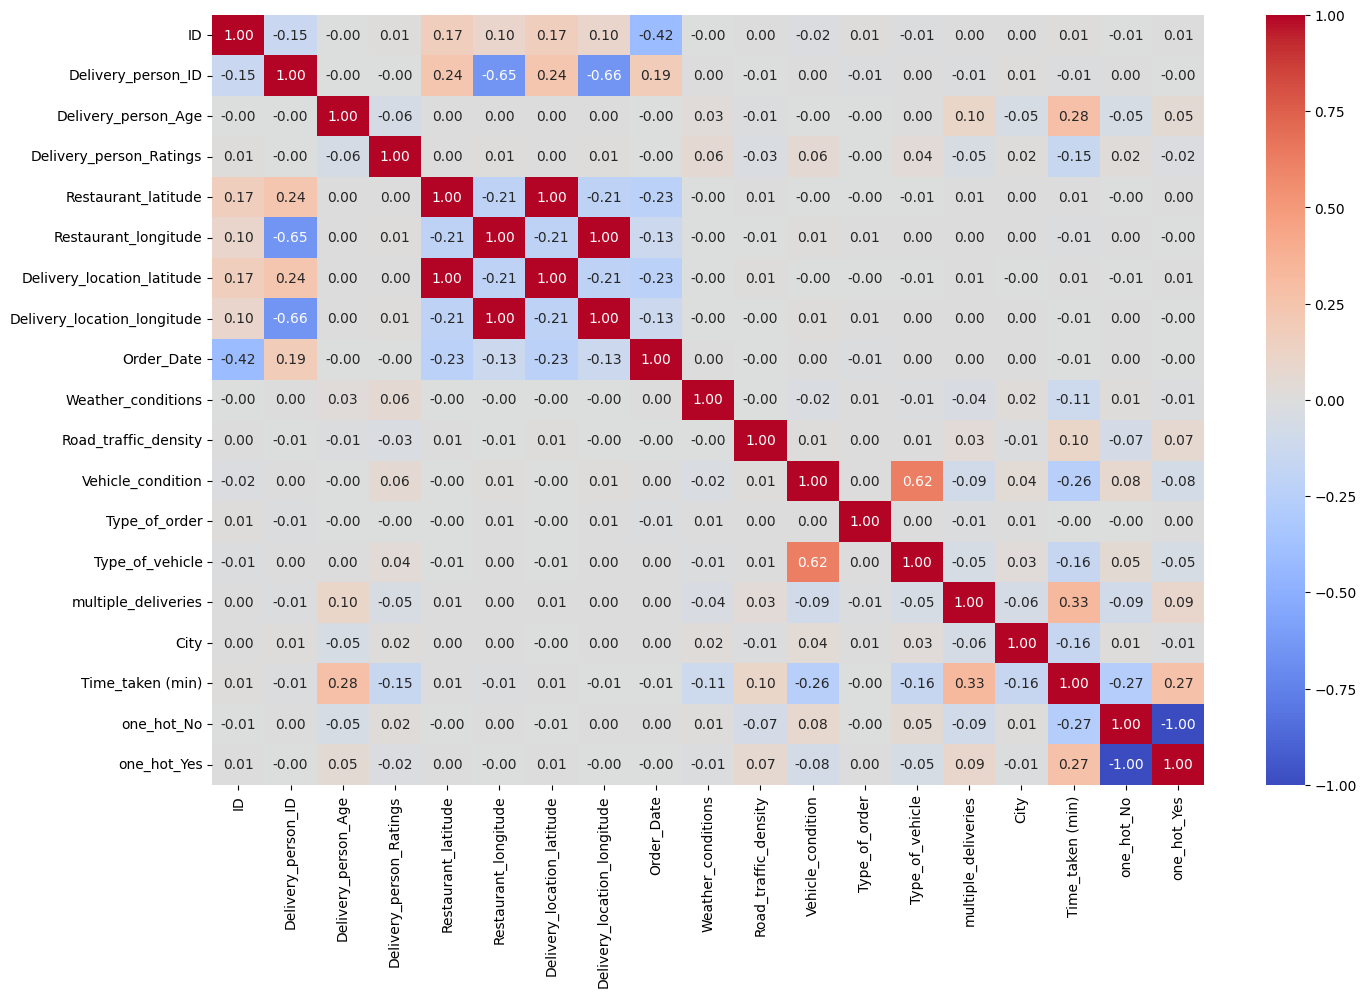

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.show()

In [ ]:
df.drop(columns=["ID","Delivery_person_ID","Restaurant_latitude","Restaurant_longitude","Delivery_location_latitude","Delivery_location_longitude","Order_Date","Type_of_order"],inplace=True)

In [ ]:
df

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,City,Time_taken (min),one_hot_No,one_hot_Yes
1,21.0,4.7,0,0,1,0,1.0,0,23,1,0
2,23.0,4.7,1,1,1,1,1.0,0,21,1,0
3,34.0,4.3,1,2,0,0,0.0,0,20,1,0
4,24.0,4.7,2,3,1,1,1.0,0,41,1,0
5,29.0,4.5,1,3,2,2,1.0,0,20,1,0
...,...,...,...,...,...,...,...,...,...,...,...
45575,37.0,4.8,1,2,2,2,0.0,0,20,1,0
45577,28.0,4.9,1,3,1,1,1.0,0,29,1,0
45579,30.0,4.8,4,0,1,0,0.0,0,32,1,0
45581,30.0,4.9,3,2,1,1,0.0,0,16,1,0


#***`Data Scaling`***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33765 entries, 1 to 45582
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      33765 non-null  float64
 1   Delivery_person_Ratings  33765 non-null  float64
 2   Weather_conditions       33765 non-null  int64  
 3   Road_traffic_density     33765 non-null  int64  
 4   Vehicle_condition        33765 non-null  int64  
 5   Type_of_vehicle          33765 non-null  int64  
 6   multiple_deliveries      33765 non-null  float64
 7   City                     33765 non-null  int64  
 8   Time_taken (min)         33765 non-null  int64  
 9   one_hot_No               33765 non-null  int64  
 10  one_hot_Yes              33765 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 3.1 MB


##***`MinMaxScaler()`***

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#MinMax Scaling
minmax_scaler=MinMaxScaler()

df_minmax_scaled=minmax_scaler.fit_transform(df)

In [ ]:
df_minmax_scaled

array([[0.05263158, 0.57142857, 0.        , ..., 0.31707317, 1.        ,
        0.        ],
       [0.15789474, 0.57142857, 0.2       , ..., 0.26829268, 1.        ,
        0.        ],
       [0.73684211, 0.        , 0.2       , ..., 0.24390244, 1.        ,
        0.        ],
       ...,
       [0.52631579, 0.71428571, 0.8       , ..., 0.53658537, 1.        ,
        0.        ],
       [0.52631579, 0.85714286, 0.6       , ..., 0.14634146, 1.        ,
        0.        ],
       [0.        , 0.57142857, 0.6       , ..., 0.3902439 , 1.        ,
        0.        ]])

In [ ]:
df_minmax_scaled=pd.DataFrame(df_minmax_scaled,columns=df.columns)
df_minmax_scaled

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,City,Time_taken (min),one_hot_No,one_hot_Yes
0,0.052632,0.571429,0.0,0.000000,0.333333,0.000000,0.5,0.0,0.317073,1.0,0.0
1,0.157895,0.571429,0.2,0.333333,0.333333,0.333333,0.5,0.0,0.268293,1.0,0.0
2,0.736842,0.000000,0.2,0.666667,0.000000,0.000000,0.0,0.0,0.243902,1.0,0.0
3,0.210526,0.571429,0.4,1.000000,0.333333,0.333333,0.5,0.0,0.756098,1.0,0.0
4,0.473684,0.285714,0.2,1.000000,0.666667,0.666667,0.5,0.0,0.243902,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
33760,0.894737,0.714286,0.2,0.666667,0.666667,0.666667,0.0,0.0,0.243902,1.0,0.0
33761,0.421053,0.857143,0.2,1.000000,0.333333,0.333333,0.5,0.0,0.463415,1.0,0.0
33762,0.526316,0.714286,0.8,0.000000,0.333333,0.000000,0.0,0.0,0.536585,1.0,0.0
33763,0.526316,0.857143,0.6,0.666667,0.333333,0.333333,0.0,0.0,0.146341,1.0,0.0


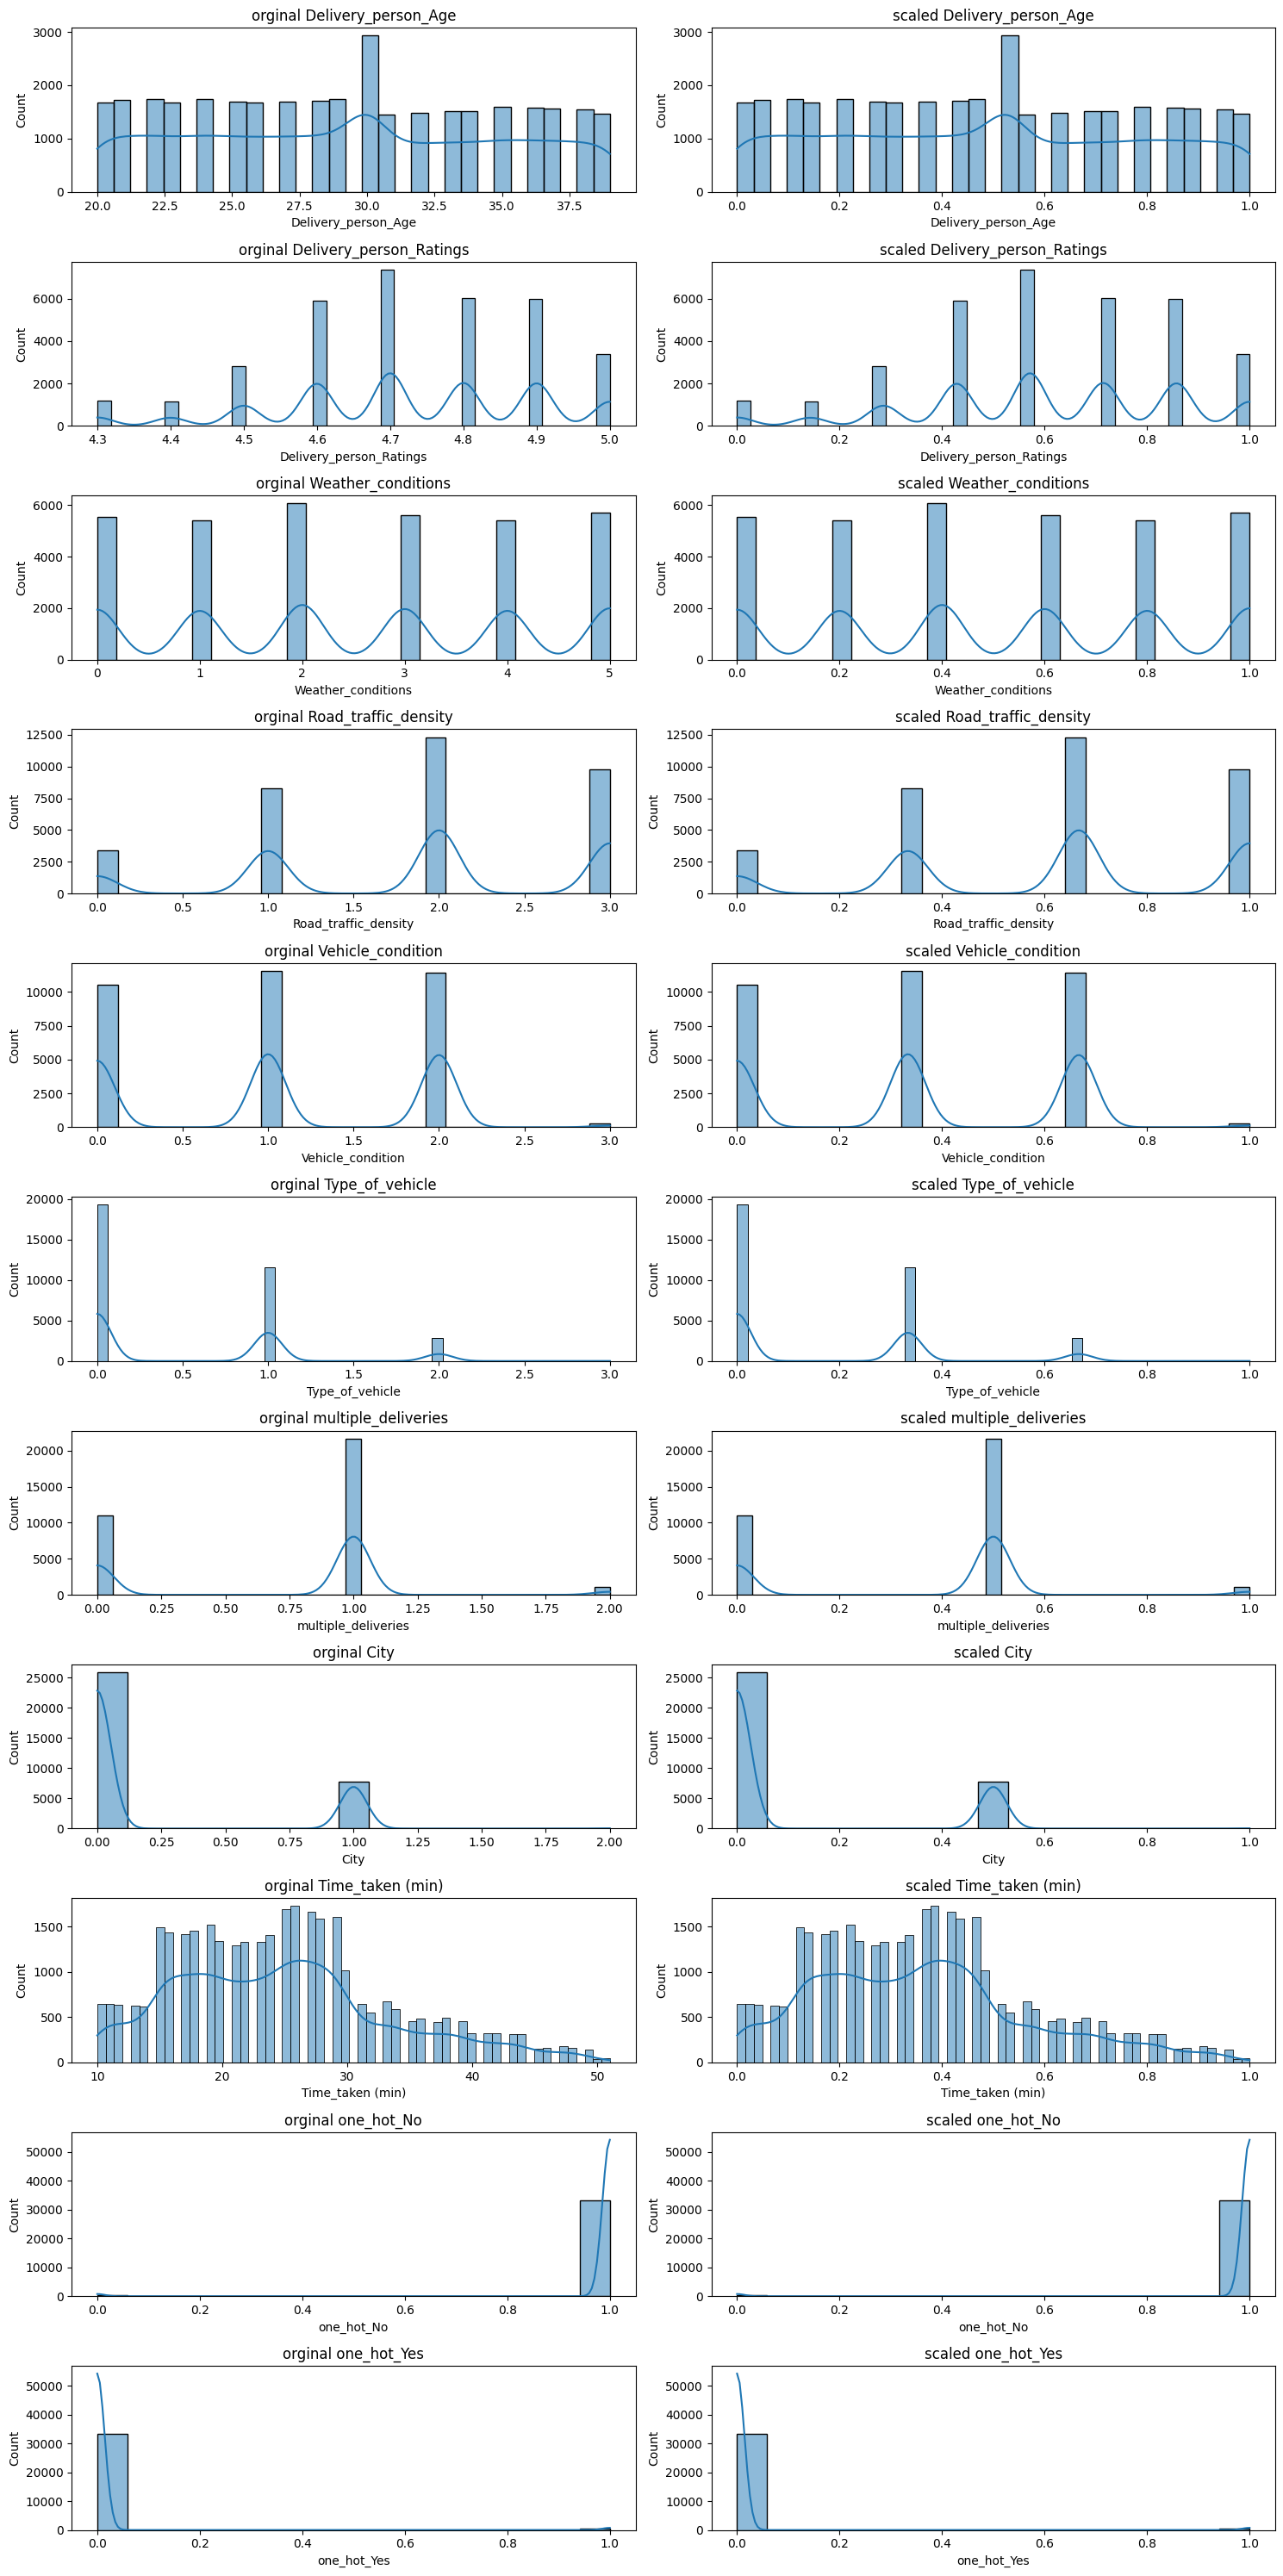

In [ ]:
#create subplots
plt.figure(figsize=(15,30))

#orginal and scaled data histograms for each feature
plt.subplot(11,2,1)
sns.histplot(df["Delivery_person_Age"],kde=True)
plt.title("orginal Delivery_person_Age")

plt.subplot(11,2,2)
sns.histplot(df_minmax_scaled["Delivery_person_Age"],kde=True)
plt.title("scaled Delivery_person_Age")

plt.subplot(11,2,3)
sns.histplot(df["Delivery_person_Ratings"],kde=True)
plt.title("orginal Delivery_person_Ratings")

plt.subplot(11,2,4)
sns.histplot(df_minmax_scaled["Delivery_person_Ratings"],kde=True)
plt.title("scaled Delivery_person_Ratings")

plt.subplot(11,2,5)
sns.histplot(df["Weather_conditions"],kde=True)
plt.title("orginal Weather_conditions")

plt.subplot(11,2,6)
sns.histplot(df_minmax_scaled["Weather_conditions"],kde=True)
plt.title("scaled Weather_conditions")

plt.subplot(11,2,7)
sns.histplot(df["Road_traffic_density"],kde=True)
plt.title("orginal Road_traffic_density")

plt.subplot(11,2,8)
sns.histplot(df_minmax_scaled["Road_traffic_density"],kde=True)
plt.title("scaled Road_traffic_density")

plt.subplot(11,2,9)
sns.histplot(df["Vehicle_condition"],kde=True)
plt.title("orginal Vehicle_condition")

plt.subplot(11,2,10)
sns.histplot(df_minmax_scaled["Vehicle_condition"],kde=True)
plt.title("scaled Vehicle_condition")

plt.subplot(11,2,11)
sns.histplot(df["Type_of_vehicle"],kde=True)
plt.title("orginal Type_of_vehicle")

plt.subplot(11,2,12)
sns.histplot(df_minmax_scaled["Type_of_vehicle"],kde=True)
plt.title("scaled Type_of_vehicle")

plt.subplot(11,2,13)
sns.histplot(df["multiple_deliveries"],kde=True)
plt.title("orginal multiple_deliveries")

plt.subplot(11,2,14)
sns.histplot(df_minmax_scaled["multiple_deliveries"],kde=True)
plt.title("scaled multiple_deliveries")

plt.subplot(11,2,15)
sns.histplot(df["City"],kde=True)
plt.title("orginal City")

plt.subplot(11,2,16)
sns.histplot(df_minmax_scaled["City"],kde=True)
plt.title("scaled City")

plt.subplot(11,2,17)
sns.histplot(df["Time_taken (min)"],kde=True)
plt.title("orginal Time_taken (min)")

plt.subplot(11,2,18)
sns.histplot(df_minmax_scaled["Time_taken (min)"],kde=True)
plt.title("scaled Time_taken (min)")

plt.subplot(11,2,19)
sns.histplot(df["one_hot_No"],kde=True)
plt.title("orginal one_hot_No")

plt.subplot(11,2,20)
sns.histplot(df_minmax_scaled["one_hot_No"],kde=True)
plt.title("scaled one_hot_No")

plt.subplot(11,2,21)
sns.histplot(df["one_hot_Yes"],kde=True)
plt.title("orginal one_hot_Yes")

plt.subplot(11,2,22)
sns.histplot(df_minmax_scaled["one_hot_Yes"],kde=True)
plt.title("scaled one_hot_Yes")

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

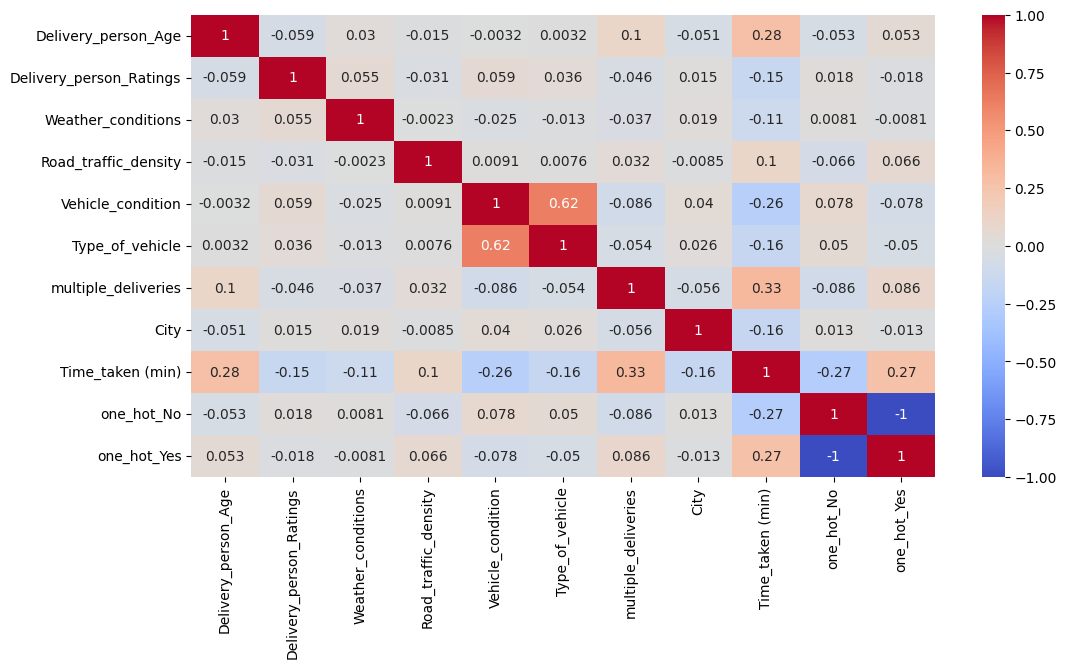

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df_minmax_scaled.corr(),annot=True,cmap="coolwarm")
plt.show

In [ ]:
df_minmax_scaled.corr()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,City,Time_taken (min),one_hot_No,one_hot_Yes
Delivery_person_Age,1.000000,-0.059296,0.030323,-0.014772,-0.003222,0.003157,0.101992,-0.050594,0.280144,-0.052829,0.052829
Delivery_person_Ratings,-0.059296,1.000000,0.055446,-0.030688,0.058977,0.036304,-0.046053,0.015094,-0.154338,0.018426,-0.018426
Weather_conditions,0.030323,0.055446,1.000000,-0.002261,-0.024957,-0.012561,-0.036948,0.019310,-0.110530,0.008083,-0.008083
Road_traffic_density,-0.014772,-0.030688,-0.002261,1.000000,0.009150,0.007576,0.032128,-0.008490,0.104197,-0.065674,0.065674
Vehicle_condition,-0.003222,0.058977,-0.024957,0.009150,1.000000,0.624478,-0.086327,0.039647,-0.255937,0.077613,-0.077613
Type_of_vehicle,0.003157,0.036304,-0.012561,0.007576,0.624478,1.000000,-0.054238,0.025849,-0.158716,0.049804,-0.049804
multiple_deliveries,0.101992,-0.046053,-0.036948,0.032128,-0.086327,-0.054238,1.000000,-0.056011,0.327697,-0.086059,0.086059
City,-0.050594,0.015094,0.019310,-0.008490,0.039647,0.025849,-0.056011,1.000000,-0.160452,0.013402,-0.013402
Time_taken (min),0.280144,-0.154338,-0.110530,0.104197,-0.255937,-0.158716,0.327697,-0.160452,1.000000,-0.267626,0.267626
one_hot_No,-0.052829,0.018426,0.008083,-0.065674,0.077613,0.049804,-0.086059,0.013402,-0.267626,1.000000,-1.000000


In [ ]:
df_minmax_scaled.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_vehicle',
       'multiple_deliveries', 'City', 'Time_taken (min)', 'one_hot_No',
       'one_hot_Yes'],
      dtype='object')

#***`Dimensionality Reduction`***

In [ ]:
x=df_minmax_scaled.drop(columns=['Time_taken (min)'])
y=df_minmax_scaled['Time_taken (min)']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

from sklearn.metrics import r2_score, mean_squared_error

# #Training predictions
# y_train_pred = model.predict(x_train)
# r2_train = r2_score(y_train , y_train_pred)
# mse_train = mean_squared_error(y_train , y_train_pred)

#Validation predictions
y_val_pred=model.predict(x_test)  #use validation set
r2_val=r2_score(y_test,y_val_pred)
mse_val=mean_squared_error(y_test,y_val_pred)

#print("R2 score (Train):",r2_train)
print("R2 score (validation):",r2_val)
#print("MSE (Train):",mse_train)
print("MSE (validation):",mse_val)

R2 score (validation): 0.32435926210295385
MSE (validation): 0.0310947621651668


##***`Feature Extraction (PCA)`***

In [ ]:
x=df_minmax_scaled.drop(columns=['Time_taken (min)'])
y=df_minmax_scaled['Time_taken (min)']

In [ ]:
x.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,City,one_hot_No,one_hot_Yes
0,0.052632,0.571429,0.0,0.000000,0.333333,0.000000,0.5,0.0,1.0,0.0
1,0.157895,0.571429,0.2,0.333333,0.333333,0.333333,0.5,0.0,1.0,0.0
2,0.736842,0.000000,0.2,0.666667,0.000000,0.000000,0.0,0.0,1.0,0.0
3,0.210526,0.571429,0.4,1.000000,0.333333,0.333333,0.5,0.0,1.0,0.0
4,0.473684,0.285714,0.2,1.000000,0.666667,0.666667,0.5,0.0,1.0,0.0


In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

x_pca=pca.fit_transform(x)

In [ ]:
x_pca

array([[-0.49708549, -0.06631145],
       [-0.32875629,  0.07807635],
       [-0.26570382, -0.44227386],
       ...,
       [ 0.36327323,  0.07454886],
       [ 0.12291912,  0.19460977],
       [ 0.12172093, -0.25550605]])

##***`Train Test Split`***

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(27012, 2)
(6753, 2)
(27012,)
(6753,)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# #Training predictions
# y_train_pred = model.predict(x_train)
# r2_train = r2_score(y_train , y_train_pred)
# mse_train = mean_squared_error(y_train , y_train_pred)

#Validation predictions
y_val_pred=model.predict(x_test)  #use validation set
r2_val=r2_score(y_test,y_val_pred)
mse_val=mean_squared_error(y_test,y_val_pred)

#print("R2 score (Train):",r2_train)
print("R2 score (validation):",r2_val)
#print("MSE (Train):",mse_train)
print("MSE (validation):",mse_val)

R2 score (validation): 0.16640876984120578
MSE (validation): 0.038364058871634014


#***`EVALUATION METRICS IN REGRESSION`***

##***`MAE`***

In [ ]:
#MAE (mean absolute error)
from sklearn.metrics import mean_absolute_error

mae=mean_absolute_error(y_test,y_val_pred)
print("MAE:",mae)

MAE: 0.15816687321290096


##***`MSE`***

In [ ]:
#MSE (mean squared error)
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test,y_val_pred)
print("MSE:",mse)

MSE: 0.038364058871634014


##***`RMSE`***

In [ ]:
#RMSE (root mean squared error)
rmse=np.sqrt(mse)
print("RMSE:",rmse)

RMSE: 0.1958674523029133


##***`R2 score`***

In [ ]:
#R2 score(R-squared)
from sklearn.metrics import r2_score

r2=r2_score(y_test,y_val_pred)
print("R2 score:",r2)

R2 score: 0.16640876984120578
